# Scenario Generation
## Review Source Data

The contextual foundation of the generated images and metadata are based on existing forms of data. Creating a scenario to match social movevment posts on a social media platform. This notebook fetches and prepares data from three sources:
1. [**Atropia Data**](https://odin.tradoc.army.mil/DATE/Caucasus/Atropia): *Fictional country news samples for context.* News reports and stories a fictional country named atropia. This data was created for training purposes by the United States military.
2. [**World Bank Demographics**](https://microdata.worldbank.org/index.php/catalog/5906/study-description): *Synthetic demographic profiles.*  Data variables include imaginary individual and household demographic data.
3. **Social Media References**: *Visual descriptions and image support for image generation.* Images and metadata from data collection process

*Workshop*: AI/ML Pipeline - Synthetic Data Generation; January 23, 2026  
*Platform*: CyVerse Jupyter Lab PyTorch GPU

## Setup

Import required modules and configure paths.

Getting modules from `DataCollection/src`
#These particularly contiain modules that will load the raw data (data_loader.py), and different configurations (config.py) that handle API keys, generation parameters, and output paths.



In [13]:
# basic needs
import sys
from pathlib import Path
import json
import pandas as pd

#visualize
import matplotlib.pyplot as plt
from collections import Counter



#### Load Configuration

Load configuration settings for data fetching.

In [4]:
# Add parent directory to path to import src modules
parent_dir = Path.cwd().parent
if str(parent_dir) not in sys.path:
    sys.path.insert(0, str(parent_dir))

#load in files with python classes (modules) from the src folder
from src import config, data_loader
print("Modules imported successfully")

# Load configuration module from src folder
cfg = config.load_config()

# Get source data configuration
source_config = cfg.source_data

# set path to get the scenario generation data
data_dir = cfg.get_data_path('raw')


2026-01-22 10:08:52,936 - src.config - INFO - Loaded environment variables from c:\Users\lwert\OneDrive - University of Arizona\Documents\Fellowships\Jetstream\AI-ML_PipelineWorkshop\DataCollection\config\.env
2026-01-22 10:08:52,958 - src.config - INFO - Loaded configuration from c:\Users\lwert\OneDrive - University of Arizona\Documents\Fellowships\Jetstream\AI-ML_PipelineWorkshop\DataCollection\config\generation_config.yaml
2026-01-22 10:08:52,970 - src.config - INFO - Logging configured successfully


Modules imported successfully


## 1. Fetch Atropia Data

Atropia is a fictional country used in U.S. military training scenarios. We'll generate news samples about political events, protests, and civil society activities based on the fictional country. 
- information on where the scenario is generated from can be found here: https://odin.tradoc.army.mil/DATE/Caucasus/Atropia/Political:_Atropia
- Add in your own information to create a specific scenario for the narrative.
    - scr/data_loader.py > class AtropiaDataLoader > def  _generate_synthetic_samples()
    - you need to restart the kernel after this.

In [10]:
# Initialize Atropia data loader
atropia_loader = data_loader.AtropiaDataLoader(
    data_dir=data_dir,
    num_samples=source_config['atropia']['num_samples']
)

# Fetch data
print("Fetching Atropia data")
atropia_data = atropia_loader.fetch_data()

print(f"\nLoaded {len(atropia_data)} Atropia samples")
print(f"Saved to: {data_dir / 'atropia_samples.json'}")

2026-01-22 10:13:48,269 - src.data_loader - INFO - Fetching Atropia data from sampled scenarios based on Atropia and specific social movement.
2026-01-22 10:13:48,279 - src.data_loader - INFO - Saved Atropia data to c:\Users\lwert\OneDrive - University of Arizona\Documents\Fellowships\Jetstream\AI-ML_PipelineWorkshop\DataCollection\data\raw\atropia_samples.json
2026-01-22 10:13:48,288 - src.data_loader - INFO - Loaded 100 Atropia samples


Fetching Atropia data

Loaded 100 Atropia samples
Saved to: c:\Users\lwert\OneDrive - University of Arizona\Documents\Fellowships\Jetstream\AI-ML_PipelineWorkshop\DataCollection\data\raw\atropia_samples.json


### Preview Atropia Data

Let's look at a few samples to understand the data structure.

In [11]:
# Display first 3 samples
print("Sample Atropia News:")
print("=" * 80)

for i, sample in enumerate(atropia_data[:3], 1):
    print(f"\n{i}. {sample['title']}")
    print(f"   Theme: {sample['theme']}")
    print(f"   Location: {sample['location']}")
    print(f"   Excerpt: {sample['excerpt']}")
    print("-" * 80)

Sample Atropia News:

1. Atropia News: Social Movements
   Theme: social_movements
   Location: University District
   Excerpt: Government announces new policy regarding minority rights. Civil society groups express strong support.
--------------------------------------------------------------------------------

2. Atropia News: Political Unrest
   Theme: political_unrest
   Location: Market District
   Excerpt: Women march through Market District protesting environmental policy garnering strong support drawing hundreds of.
--------------------------------------------------------------------------------

3. Atropia News: Social Movements
   Theme: social_movements
   Location: Industrial Zone
   Excerpt: Workers union leads march through Industrial Zone protesting minority rights.
--------------------------------------------------------------------------------


### Analyze Atropia Themes

Let's see the distribution of themes in our dataset.

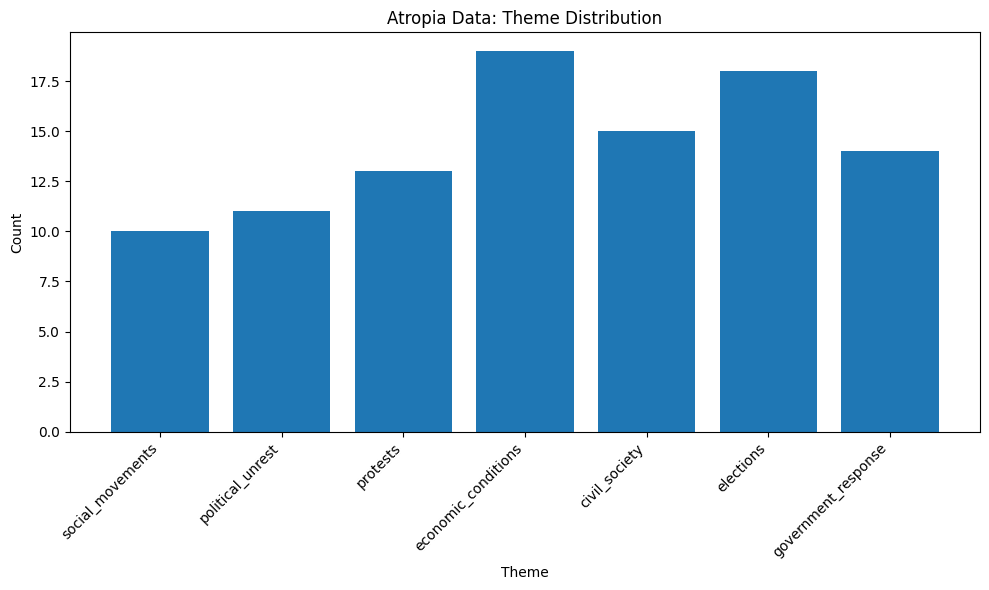

Theme distribution:
  economic_conditions: 19
  elections: 18
  civil_society: 15
  government_response: 14
  protests: 13
  political_unrest: 11
  social_movements: 10


In [14]:
# Count themes
themes = [sample['theme'] for sample in atropia_data]
theme_counts = Counter(themes)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(theme_counts.keys(), theme_counts.values())
plt.xlabel('Theme')
plt.ylabel('Count')
plt.title('Atropia Data: Theme Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Theme distribution:")
for theme, count in theme_counts.most_common():
    print(f"  {theme}: {count}")

## 2. Fetch World Bank Demographics

Get World Bank Data: Synthetic Data for an Imaginary Country, Sample, 2023 from the web. A synthetic hierarchical dataset for simulation and training purposes. 
- https://microdata.worldbank.org/catalog/5906/get-microdata
    - scr/data_loader.py > class WorldBankDataLoader > def fetch_data()
If this fails, generate synthetic demographic profiles based on World Bank data patterns.
- scr/data_loader.py > class WorldBankDataLoader > def _generate_synthetic_demographics()


In [15]:
# Initialize World Bank data loader
worldbank_loader = data_loader.WorldBankDataLoader(
    data_dir=data_dir,
    num_profiles=source_config['worldbank']['num_profiles']
)

# Fetch data
print("Fetching World Bank demographic data")
worldbank_data = worldbank_loader.fetch_data()

print(f"\nLoaded {len(worldbank_data)} demographic profiles")
print(f"  Saved to: {data_dir / 'worldbank_demographics.csv'}")

Fetching World Bank demographic data


2026-01-22 10:14:43,119 - src.data_loader - WARNING - Could not fetch from web. Generating synthetic Atropia samples.
2026-01-22 10:14:43,129 - src.data_loader - INFO - Generating World Bank demographics from typical world bank data.
2026-01-22 10:14:43,139 - src.data_loader - INFO - Saved 50 demographic profiles to c:\Users\lwert\OneDrive - University of Arizona\Documents\Fellowships\Jetstream\AI-ML_PipelineWorkshop\DataCollection\data\raw\worldbank_demographics.csv



Loaded 50 demographic profiles
  Saved to: c:\Users\lwert\OneDrive - University of Arizona\Documents\Fellowships\Jetstream\AI-ML_PipelineWorkshop\DataCollection\data\raw\worldbank_demographics.csv


### Preview World Bank Demographics

In [16]:
# Display first few profiles
print("Sample Demographic Profiles:")
print(worldbank_data.head(10))

print("\nDataset Info:")
print(worldbank_data.info())

Sample Demographic Profiles:
  profile_id age_group   occupation education_level   setting  household_size
0     wb_001     35-44      service   undergraduate     urban               2
1     wb_002     25-34   healthcare       secondary  suburban               1
2     wb_003     25-34  agriculture        graduate  suburban               4
3     wb_004     35-44      student        graduate  suburban               5
4     wb_005     18-24       retail       secondary  suburban               4
5     wb_006     35-44   government       secondary  suburban               4
6     wb_007     45-54  agriculture    professional     urban               6
7     wb_008       65+      service       secondary     rural               4
8     wb_009     25-34   healthcare   undergraduate     urban               2
9     wb_010     45-54      service         primary     urban               3

Dataset Info:
<class 'pandas.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Co

### Analyze Demographics Distribution

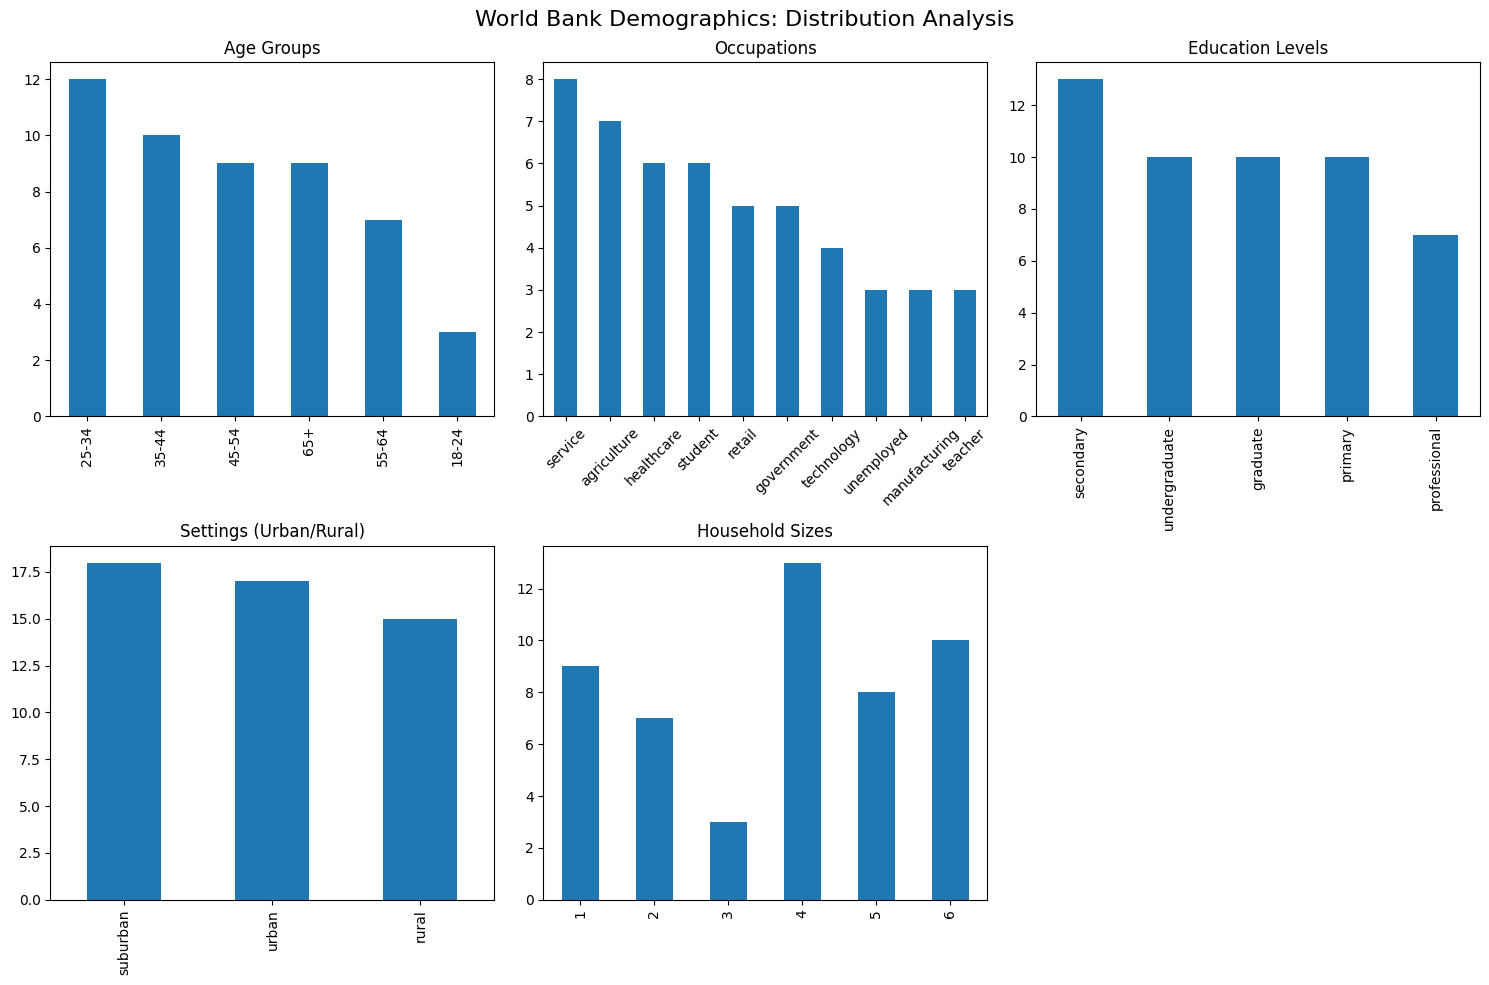

In [17]:
# Create subplots for different demographic categories
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('World Bank Demographics: Distribution Analysis', fontsize=16)

# Age groups
worldbank_data['age_group'].value_counts().plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Age Groups')
axes[0, 0].set_xlabel('')

# Occupations
worldbank_data['occupation'].value_counts().plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Occupations')
axes[0, 1].set_xlabel('')
axes[0, 1].tick_params(axis='x', rotation=45)

# Education levels
worldbank_data['education_level'].value_counts().plot(kind='bar', ax=axes[0, 2])
axes[0, 2].set_title('Education Levels')
axes[0, 2].set_xlabel('')

# Settings
worldbank_data['setting'].value_counts().plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Settings (Urban/Rural)')
axes[1, 0].set_xlabel('')

# Household sizes
worldbank_data['household_size'].value_counts().sort_index().plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Household Sizes')
axes[1, 1].set_xlabel('')

# Hide last subplot
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

## 3. Load Social Media References

Load visual descriptions or reference images for prompt construction. Here, I put in my own json file of social media descriptions, but you don't have to. You can build your own scenario using your own image descriptions and visual elements.
- Add in your own information to create a specific scenario for the narrative. Particularly a json file of your own descriptions:
    - DataCollection/data/raw/your_json_file.json
        - add file to scr/data_loader.py > class SocialMediaDataLoader > def  _init_()
        - you need to restart the kernel after this.
- If this fails, add your own desctiptions or keep the ones provided: scr/data_loader.py > class SocialMediaDataLoader > def _generate_placeholder_descriptions()

In [5]:
# Initialize social media data loader
socialmedia_loader = data_loader.SocialMediaDataLoader(data_dir=data_dir)

# Load descriptions
print("Loading social media visual references")
socialmedia_data = socialmedia_loader.load_descriptions()

print(f"\nLoaded {len(socialmedia_data)} visual references")

2026-01-22 10:09:04,991 - src.data_loader - INFO - Loading visual descriptions from c:\Users\lwert\OneDrive - University of Arizona\Documents\Fellowships\Jetstream\AI-ML_PipelineWorkshop\DataCollection\data\raw\imagepath_labels_descp.json


Loading social media visual references

Loaded 16567 visual references


### Preview Visual References

In [ ]:
# Display first few references
print("Sample Visual References:")
print("=" * 80)

for i, ref in enumerate(socialmedia_data[:5], 1):
    print(f"\n{i}. {ref['description']}")
    # print(f"   Setting: {ref.get('setting', 'N/A')}") #default visual scenario generations
    # print(f"   Activity: {ref.get('activity_level', 'N/A')}") #default visual scenario generations
    print(f"   Llama4 Scout Generated Label 1: {ref.get('label_1', 'N/A')}")
    print(f"   Llama4 Scout Generated Label 2: {ref.get('label_2', 'N/A')}")
    print("-" * 80)

Sample Visual References:

1. a digital image with a purple background and white text in spanish that reads '¡frases feministas para tus cartelles del 8m!' and a hand holding a sign with a female symbol.
   Llama4 Scout Generated Label 1: digital image with text in spanish
   Llama4 Scout Generated Label 2: protest
--------------------------------------------------------------------------------

2. a person holds up a purple sign with spanish text that reads 'if we don't have the same fears, then we don't have the same rights' and features a female symbol and the hashtag #yotecreo, in front of a blurred background of people and a building with a dome.
   Llama4 Scout Generated Label 1: digital image with text in spanish
   Llama4 Scout Generated Label 2: protest
--------------------------------------------------------------------------------

3. a screenshot of a twitter post with text in english and a reply in spanish, discussing a topic related to gender and relationships.
   Llama4 

## 4. Combine Data Sources

Demonstrate how data from all three sources can be combined for prompt generation.

In [19]:
# Initialize data combiner
combined = data_loader.DataCombiner(
    atropia_loader=atropia_loader,
    worldbank_loader=worldbank_loader,
    socialmedia_loader=socialmedia_loader
)

# Generate 5 sample combinations
print("Generating sample data combinations")
combined_samples = combined.sample_combined(n=10)

print(f"\n Generated {len(combined_samples)} combined samples")

2026-01-22 10:16:25,983 - src.data_loader - INFO - Loading Atropia data from c:\Users\lwert\OneDrive - University of Arizona\Documents\Fellowships\Jetstream\AI-ML_PipelineWorkshop\DataCollection\data\raw\atropia_samples.json
2026-01-22 10:16:25,986 - src.data_loader - INFO - Loading World Bank data from c:\Users\lwert\OneDrive - University of Arizona\Documents\Fellowships\Jetstream\AI-ML_PipelineWorkshop\DataCollection\data\raw\worldbank_demographics.csv
2026-01-22 10:16:25,992 - src.data_loader - INFO - Loading visual descriptions from c:\Users\lwert\OneDrive - University of Arizona\Documents\Fellowships\Jetstream\AI-ML_PipelineWorkshop\DataCollection\data\raw\imagepath_labels_descp.json
2026-01-22 10:16:26,042 - src.data_loader - INFO - Loading Atropia data from c:\Users\lwert\OneDrive - University of Arizona\Documents\Fellowships\Jetstream\AI-ML_PipelineWorkshop\DataCollection\data\raw\atropia_samples.json
2026-01-22 10:16:26,045 - src.data_loader - INFO - Loading World Bank data fr

Generating sample data combinations


2026-01-22 10:16:26,161 - src.data_loader - INFO - Loading World Bank data from c:\Users\lwert\OneDrive - University of Arizona\Documents\Fellowships\Jetstream\AI-ML_PipelineWorkshop\DataCollection\data\raw\worldbank_demographics.csv
2026-01-22 10:16:26,166 - src.data_loader - INFO - Loading visual descriptions from c:\Users\lwert\OneDrive - University of Arizona\Documents\Fellowships\Jetstream\AI-ML_PipelineWorkshop\DataCollection\data\raw\imagepath_labels_descp.json
2026-01-22 10:16:26,202 - src.data_loader - INFO - Loading Atropia data from c:\Users\lwert\OneDrive - University of Arizona\Documents\Fellowships\Jetstream\AI-ML_PipelineWorkshop\DataCollection\data\raw\atropia_samples.json
2026-01-22 10:16:26,202 - src.data_loader - INFO - Loading World Bank data from c:\Users\lwert\OneDrive - University of Arizona\Documents\Fellowships\Jetstream\AI-ML_PipelineWorkshop\DataCollection\data\raw\worldbank_demographics.csv
2026-01-22 10:16:26,208 - src.data_loader - INFO - Loading visual de


 Generated 10 combined samples


### Preview Combined Data

In [20]:
# Display combined samples
print("Sample Combined Data:")
print("=" * 80)

for i, sample in enumerate(combined_samples, 1):
    print(f"\nCombination {i}:")
    print(f"  Atropia Theme: {sample['atropia']['theme']}")
    print(f"  Atropia Location: {sample['atropia']['location']}")
    print(f"  Demographics: Age {sample['demographics']['age_group']}, {sample['demographics']['occupation']}")
    print(f"  Visual Reference: {sample['visual_reference']['description']}")
    print("-" * 80)

Sample Combined Data:

Combination 1:
  Atropia Theme: elections
  Atropia Location: University District
  Demographics: Age 35-44, healthcare
  Visual Reference: a photo of a building with wooden doors and windows covered in papers with spanish text, possibly a protest or demonstration.
--------------------------------------------------------------------------------

Combination 2:
  Atropia Theme: government_response
  Atropia Location: Industrial Zone
  Demographics: Age 18-24, service
  Visual Reference: a blue digital image with white text in spanish, discussing psychological manipulation and dark psychology.
--------------------------------------------------------------------------------

Combination 3:
  Atropia Theme: government_response
  Atropia Location: Downtown
  Demographics: Age 35-44, agriculture
  Visual Reference: a group of women posing for a photo in front of a large red banner with white text, holding signs and wearing casual clothing, with a logo in the bottom lef

## Summary

All source data has been prepared and is ready for image generation!

In [21]:
print("\n" + "=" * 80)
print("SOURCE DATA PREPARATION COMPLETE")
print("=" * 80)
print(f"\nAtropia samples: {len(atropia_data)}")
print(f"World Bank profiles: {len(worldbank_data)}")
print(f"Visual references: {len(socialmedia_data)}")
print(f"\nAll data saved to: {data_dir}")


SOURCE DATA PREPARATION COMPLETE

Atropia samples: 100
World Bank profiles: 50
Visual references: 16567

All data saved to: c:\Users\lwert\OneDrive - University of Arizona\Documents\Fellowships\Jetstream\AI-ML_PipelineWorkshop\DataCollection\data\raw
